# Comparing the predicted masks with the ground truth
- Precision, Recall, Accuracy, Dice, IoU

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import cv2

#### Metrics functions

In [3]:
# def recall_score_(groundtruth_mask, pred_mask):
#     intersect = np.sum(pred_mask*groundtruth_mask)
#     total_pixel_truth = np.sum(groundtruth_mask)
#     recall = np.mean(intersect/total_pixel_truth)
#     return round(recall, 3)

# # def iou(groundtruth_mask, pred_mask):
# #     intersect = np.sum(pred_mask*groundtruth_mask)
# #     union = np.sum(pred_mask) + np.sum(groundtruth_mask) - intersect
# #     iou = np.mean(intersect/union)
# #     return round(iou, 3)

# def iou(mask1, mask2):
#     # Calculate intersection and union
#     intersection = np.logical_and(mask1, mask2)
#     union = np.logical_or(mask1, mask2)
    
#     # Compute IoU
#     iou = np.sum(intersection) / np.sum(union)
#     return iou

# # def dice_coef(groundtruth_mask, pred_mask):
# #     intersect = np.sum(pred_mask*groundtruth_mask)
# #     total_sum = np.sum(pred_mask) + np.sum(groundtruth_mask)
# #     dice = np.mean(2*intersect/total_sum)
# #     return round(dice, 3) #round up to 3 decimal places

# def dice_coef(mask1, mask2):
#     # Calculate intersection
#     intersection = np.logical_and(mask1, mask2)
    
#     # Compute Dice coefficient
#     dice_coefficient = 2 * np.sum(intersection) / (np.sum(mask1) + np.sum(mask2))
#     return round(dice_coefficient,3)

# def accuracy(groundtruth_mask, pred_mask):
#     intersect = np.sum(pred_mask*groundtruth_mask)
#     union = np.sum(pred_mask) + np.sum(groundtruth_mask) - intersect
#     xor = np.sum(groundtruth_mask==pred_mask)
#     acc = np.mean(xor/(union + xor - intersect))
#     return round(acc, 3)

# def precision_score_(groundtruth_mask, pred_mask):
#     intersect = np.sum(pred_mask*groundtruth_mask)
#     total_pixel_pred = np.sum(pred_mask)
#     precision = np.mean(intersect/total_pixel_pred)
#     return round(precision, 3)

In [4]:
def list_files_in_directory(directory):
    file_list = []
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                file_list.append(filename)
    return file_list

In [5]:
def calculate_metrics(mask1, mask2):
    mask1 = np.array(mask1)
    mask2 = np.array(mask2)
    # Convert masks to boolean arrays
    mask1_bool = mask1.astype(bool)
    mask2_bool = mask2.astype(bool)
    
    # Intersection (AND operation)
    intersection = np.logical_and(mask1_bool, mask2_bool)
    
    # Union (OR operation)
    union = np.logical_or(mask1_bool, mask2_bool)
    
    # Calculate IoU (Jaccard Index)
    iou = np.sum(intersection) / np.sum(union)
    
    # Calculate Dice coefficient
    dice = 2 * np.sum(intersection) / (np.sum(mask1_bool) + np.sum(mask2_bool))
    
    # Calculate accuracy
    accuracy = np.sum(intersection) / mask1.size
    
    # Calculate precision
    precision = np.sum(intersection) / np.sum(mask1_bool)
    
    # Calculate recall
    recall = np.sum(intersection) / np.sum(mask2_bool)
    
    return [precision,recall,accuracy,dice,iou]

In [6]:
# def metrics_table(gt_masks, pred_masks):
#     metrics = {'Precision':[],'Recall':[],'Accuracy':[],'Dice':[],'IoU':[]}
#     for i, (mask, pred) in enumerate(zip(gt_masks, pred_masks)):
#         metric_values = calculate_metrics(mask,pred)
#         metrics['Precision'].append(metric_values[0])
#         metrics['Recall'].append(metric_values[1])
#         metrics['Accuracy'].append(metric_values[2])
#         metrics['Dice'].append(metric_values[3])
#         metrics['IoU'].append(metric_values[4])
#     df = pd.DataFrame.from_dict(metrics)
#     df.columns = ['Precision', 'Recall', 'Accuracy', 'Dice', 'IoU']
#     return df

In [7]:
def metrics_table(path_gt, path_pred, gt_masks):
    metrics = {'Precision':[],'Recall':[],'Accuracy':[],'Dice':[],'IoU':[]}
    for i, gt_mask in enumerate(gt_masks):
        pred_img_path = os.path.join(path_pred,gt_mask.split(".")[0]+"-mask.jpg")
        # print(pred_img_path)
        pred = cv2.imread(pred_img_path,cv2.IMREAD_GRAYSCALE)
        # print(len(pred))
        mask_img_path = os.path.join(path_gt,gt_mask)
        # print(mask_img_path)
        mask = cv2.imread(mask_img_path,cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask,(pred.shape[:2]))
        metric_values = calculate_metrics(mask,pred)
        metrics['Precision'].append(metric_values[0])
        metrics['Recall'].append(metric_values[1])
        metrics['Accuracy'].append(metric_values[2])
        metrics['Dice'].append(metric_values[3])
        metrics['IoU'].append(metric_values[4])
    df = pd.DataFrame.from_dict(metrics)
    df.columns = ['Precision', 'Recall', 'Accuracy', 'Dice', 'IoU']
    return df

In [8]:
def metrics_table_flip(path_gt, path_pred, gt_masks):
    metrics = {'Precision':[],'Recall':[],'Accuracy':[],'Dice':[],'IoU':[]}
    for i, gt_mask in enumerate(gt_masks):
        pred_img_path = os.path.join(path_pred,gt_mask.split(".")[0]+"-mask.jpg")
        pred = cv2.imread(pred_img_path,cv2.IMREAD_GRAYSCALE)
        pred = cv2.flip(pred, 1)
        mask_img_path = os.path.join(path_gt,gt_mask)
        # print(mask_img_path)
        mask = cv2.imread(mask_img_path,cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask,(pred.shape[:2]))
        metric_values = calculate_metrics(mask,pred)
        metrics['Precision'].append(metric_values[0])
        metrics['Recall'].append(metric_values[1])
        metrics['Accuracy'].append(metric_values[2])
        metrics['Dice'].append(metric_values[3])
        metrics['IoU'].append(metric_values[4])
    df = pd.DataFrame.from_dict(metrics)
    df.columns = ['Precision', 'Recall', 'Accuracy', 'Dice', 'IoU']
    return df

#### Sample Testing with two masks

In [19]:
import matplotlib.pyplot as plt

In [11]:
import cv2

In [39]:
pred_mask = cv2.imread('D:\\Study\\Conda Projects\\CCAM\\CUSTOM\\experiments\\images\\OXFORD_RN_IN\\train\\colormaps\\Abyssinian_1-mask.jpg',cv2.IMREAD_GRAYSCALE)

In [40]:
gt_mask = cv2.imread("D:\\Study\\Conda Projects\\opdl\\Data\\masks\\Abyssinian_1.jpg",cv2.IMREAD_GRAYSCALE)
gt_mask = cv2.resize(gt_mask,(pred_mask.shape[:2]))

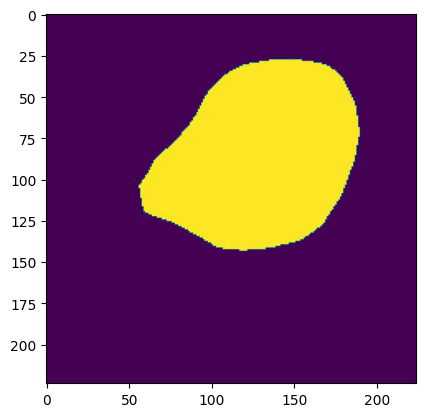

In [41]:
plt.imshow(pred_mask)
plt.show()

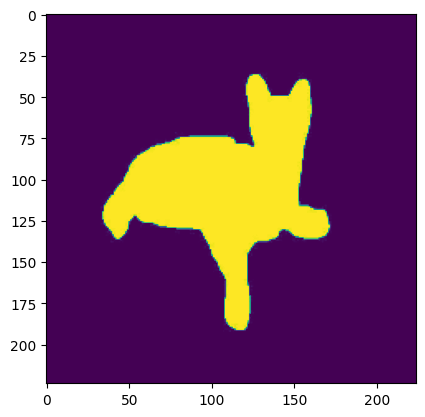

In [42]:
plt.imshow(gt_mask)
plt.show()

In [49]:
metrics_table([gt_mask], [pred_mask])

,Precision,Recall,Accuracy,Dice,IoU
0,0.77606,0.632933,0.148079,0.697227,0.535187


#### Exp-1: OXFORD Resnet50 Imagenet CCAM

Need to pass two lists of gt_masks and 
Should also provide the data_path for ground and data_path for prediction

In [7]:
data_path_gt = "D:\\Study\\Conda Projects\\opdl\\Data\\masks"
data_path_pred = "D:\\Study\\Conda Projects\\CCAM\\CUSTOM\\experiments\\images\\OXFORD_RN_IN\\train\\colormaps"

In [9]:
df_metrics = metrics_table(data_path_gt, data_path_pred, list_files_in_directory(data_path_gt))

C:\Users\anish\AppData\Local\Temp\ipykernel_15788\3977446589.py:24: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(intersection) / np.sum(mask1_bool)


In [10]:
df_metrics.head()

,Precision,Recall,Accuracy,Dice,IoU
0,0.776060,0.632933,0.148079,0.697227,0.535187
1,0.593504,0.624396,0.172612,0.608558,0.437358
2,0.436219,0.916935,0.192941,0.591188,0.419636
3,0.527489,0.680201,0.166932,0.594190,0.422667
4,0.408436,0.935789,0.287548,0.568670,0.397301


In [11]:
len(df_metrics)

7390

In [21]:
df_metrics.mean(axis=0)

Precision    0.537476
Recall       0.782410
Accuracy     0.226851
Dice         0.619128
IoU          0.463075
dtype: float64

In [13]:
df_metrics.to_csv("D:\Study\Conda Projects\CCAM\CUSTOM\experiments\scores\oxford_rn_in.csv")

#### Exp-2: POLYP Resnet50 Imagenet CCAM

In [15]:
data_path_gt_pri = "D:\\Study\\Conda Projects\\Polyp Detection\\Kvasir-SEG\\Ground Truth"
data_path_pred_pri = "D:\\Study\\Conda Projects\\CCAM\\CUSTOM\\experiments\\images\\POLYP_RN_IN\\train\\colormaps"

In [16]:
df_metrics_pri = metrics_table(data_path_gt_pri, data_path_pred_pri, list_files_in_directory(data_path_gt_pri))

In [17]:
df_metrics_pri.head()

,Precision,Recall,Accuracy,Dice,IoU
0,0.025132,0.024226,0.007314,0.024671,0.012489
1,0.060263,0.036910,0.016542,0.045780,0.023426
2,0.069519,0.071682,0.022959,0.070584,0.036583
3,0.222609,0.061573,0.025470,0.096464,0.050676
4,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
df_metrics_pri.mean(axis=0)

Precision    0.122775
Recall       0.053336
Accuracy     0.023410
Dice         0.064895
IoU          0.036907
dtype: float64

In [22]:
df_metrics_pri.to_csv("D:\Study\Conda Projects\CCAM\CUSTOM\experiments\scores\polyp_rn_in.csv")

#### Exp-3: Polyp(TrainingSet1k) Resnet50 GradCAM Metrics

In [19]:
data_path_gt_prgc = "D:\\Study\\Conda Projects\\Polyp Detection\\TrainingSet_NewGT\\masks_1k"
data_path_pred_prgc = "D:\\Study\\Conda Projects\\opdl\\Data\\polyp\\resnet50_gradcam"

In [34]:
df_metrics_prgc = metrics_table(data_path_gt_prgc, data_path_pred_prgc, list_files_in_directory(data_path_gt_prgc))

C:\Users\anish\AppData\Local\Temp\ipykernel_1260\3977446589.py:24: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(intersection) / np.sum(mask1_bool)
C:\Users\anish\AppData\Local\Temp\ipykernel_1260\3977446589.py:15: RuntimeWarning: invalid value encountered in scalar divide
  iou = np.sum(intersection) / np.sum(union)
C:\Users\anish\AppData\Local\Temp\ipykernel_1260\3977446589.py:18: RuntimeWarning: invalid value encountered in scalar divide
  dice = 2 * np.sum(intersection) / (np.sum(mask1_bool) + np.sum(mask2_bool))
C:\Users\anish\AppData\Local\Temp\ipykernel_1260\3977446589.py:27: RuntimeWarning: invalid value encountered in scalar divide
  recall = np.sum(intersection) / np.sum(mask2_bool)


In [35]:
df_metrics_prgc.head()

,Precision,Recall,Accuracy,Dice,IoU
0,NaN,0.0,0.0,0.0,0.0
1,NaN,0.0,0.0,0.0,0.0
2,NaN,0.0,0.0,0.0,0.0
3,NaN,NaN,0.0,NaN,NaN
4,NaN,NaN,0.0,NaN,NaN


In [36]:
df_metrics_prgc.mean(axis=0)

Precision    0.0
Recall       0.0
Accuracy     0.0
Dice         0.0
IoU          0.0
dtype: float64

In [37]:
df_metrics_prgc.to_csv("D:\Study\Conda Projects\CCAM\CUSTOM\experiments\scores\polyp_rn_in_gc.csv")

#### Exp-3b: Polyp Resnet50 GradCAM Metrics

In [38]:
data_path_gt_pkrgc = "D:\\Study\\Conda Projects\\Polyp Detection\\Kvasir-SEG\\Ground Truth"
data_path_pred_pkrgc = "D:\\Study\\Conda Projects\\opdl\\Data\\polyp\\resnet50_gradcam_kvasir"

In [39]:
df_metrics_pkrgc = metrics_table(data_path_gt_pkrgc, data_path_pred_pkrgc, list_files_in_directory(data_path_gt_pkrgc))

C:\Users\anish\AppData\Local\Temp\ipykernel_1260\3977446589.py:27: RuntimeWarning: invalid value encountered in scalar divide
  recall = np.sum(intersection) / np.sum(mask2_bool)


In [40]:
df_metrics_pkrgc.head()

,Precision,Recall,Accuracy,Dice,IoU
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.009897,0.082536,0.003268,0.017674,0.008916
3,0.712419,0.263735,0.081513,0.384959,0.238359
4,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
df_metrics_pkrgc.mean(axis=0)

Precision    0.027568
Recall       0.050976
Accuracy     0.003595
Dice         0.025120
IoU          0.014639
dtype: float64

In [43]:
df_metrics_prgc.to_csv("D:\Study\Conda Projects\CCAM\CUSTOM\experiments\scores\polyp_kvasir_rn_in_gc.csv")

#### Exp-4: Oxford Resenet50 GradCAM

In [44]:
data_path_gt_oxfrgc = "D:\\Study\\Conda Projects\\opdl\\Data\\images\\images"
data_path_pred_oxfrgc = "D:\\Study\\Conda Projects\\opdl\\Data\\oxford\\resnet50_gradcam"

In [53]:
df_metrics_oxfrgc = metrics_table(data_path_gt_oxfrgc, data_path_pred_oxfrgc, list_files_in_directory(data_path_gt_oxfrgc))

C:\Users\anish\AppData\Local\Temp\ipykernel_1260\3977446589.py:27: RuntimeWarning: invalid value encountered in scalar divide
  recall = np.sum(intersection) / np.sum(mask2_bool)


In [54]:
df_metrics_oxfrgc.head()

,Precision,Recall,Accuracy,Dice,IoU
0,0.053533,1.0,0.053532,0.101625,0.053533
1,0.023315,1.0,0.023079,0.045567,0.023315
2,0.031967,1.0,0.031967,0.061954,0.031967
3,0.067901,1.0,0.067901,0.127167,0.067901
4,0.034160,1.0,0.034160,0.066063,0.034160


In [55]:
df_metrics_oxfrgc.mean(axis=0)

Precision    0.188861
Recall       0.996200
Accuracy     0.188198
Dice         0.297856
IoU          0.188766
dtype: float64

In [56]:
df_metrics_prgc.to_csv("D:\Study\Conda Projects\CCAM\CUSTOM\experiments\scores\oxford_rn_in_gc.csv")

#### Exp-5: Oxford Resnet50(Pretrained) CCAM

In [9]:
data_path_gt_oxfrpcc = "D:\\Study\\Conda Projects\\opdl\\Data\\masks"
data_path_pred_oxfrpcc = "D:\\Study\\Conda Projects\\CCAM\\CUSTOM\\experiments\\images\\OXFORD_RN_PRE\\train\\colormaps"

In [10]:
df_metrics_oxfrpcc = metrics_table(data_path_gt_oxfrpcc, data_path_pred_oxfrpcc, list_files_in_directory(data_path_gt_oxfrpcc))

C:\Users\anish\AppData\Local\Temp\ipykernel_17132\3977446589.py:24: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(intersection) / np.sum(mask1_bool)


In [11]:
df_metrics_oxfrpcc.head()

,Precision,Recall,Accuracy,Dice,IoU
0,0.524650,0.518637,0.100108,0.521626,0.352838
1,0.649695,0.862301,0.188955,0.741050,0.588626
2,0.409994,0.865253,0.181342,0.556361,0.385388
3,0.764784,0.847098,0.242028,0.803839,0.672016
4,0.407134,0.942464,0.286631,0.568627,0.397260


In [12]:
df_metrics_oxfrpcc.mean(axis=0)

Precision    0.462962
Recall       0.765522
Accuracy     0.194678
Dice         0.556605
IoU          0.399418
dtype: float64

In [13]:
df_metrics_oxfrpcc.to_csv("D:\Study\Conda Projects\CCAM\CUSTOM\experiments\scores\oxford_rn_pre_cc.csv")

#### Exp-6: Oxford Resnet50 HiResCAM

In [1]:
data_path_gt_oxfrhi = "D:\\Study\\Conda Projects\\opdl\\Data\\masks"
data_path_pred_oxfrhi = "D:\\Study\\Conda Projects\\opdl\\Data\\oxford\\resnet50_hirescam"

In [10]:
df_metrics_oxfrhi = metrics_table(data_path_gt_oxfrhi, data_path_pred_oxfrhi, list_files_in_directory(data_path_gt_oxfrhi))

C:\Users\anish\AppData\Local\Temp\ipykernel_27692\3977446589.py:27: RuntimeWarning: invalid value encountered in scalar divide
  recall = np.sum(intersection) / np.sum(mask2_bool)
C:\Users\anish\AppData\Local\Temp\ipykernel_27692\3977446589.py:24: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(intersection) / np.sum(mask1_bool)
C:\Users\anish\AppData\Local\Temp\ipykernel_27692\3977446589.py:15: RuntimeWarning: invalid value encountered in scalar divide
  iou = np.sum(intersection) / np.sum(union)
C:\Users\anish\AppData\Local\Temp\ipykernel_27692\3977446589.py:18: RuntimeWarning: invalid value encountered in scalar divide
  dice = 2 * np.sum(intersection) / (np.sum(mask1_bool) + np.sum(mask2_bool))


In [11]:
df_metrics_oxfrhi.head()

,Precision,Recall,Accuracy,Dice,IoU
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.016492,0.228180,0.007294,0.030760,0.015620
3,0.091190,0.425007,0.028858,0.150161,0.081175
4,0.001897,0.039090,0.001335,0.003618,0.001812


In [12]:
df_metrics_oxfrhi.mean(axis=0)

Precision    0.359207
Recall       0.631444
Accuracy     0.142233
Dice         0.409702
IoU          0.297034
dtype: float64

In [13]:
df_metrics_oxfrhi.to_csv("D:\Study\Conda Projects\CCAM\CUSTOM\experiments\scores\oxford_rn_hirescam.csv")

#### Exp-7: Oxford Resnet50 FullGrad (10 hrs)

In [14]:
data_path_gt_oxfrfg = "D:\\Study\\Conda Projects\\opdl\\Data\\masks"
data_path_pred_oxfrfg = "D:\\Study\\Conda Projects\\opdl\\Data\\oxford\\resnet50_fullgrad"

In [15]:
df_metrics_oxfrfg = metrics_table(data_path_gt_oxfrfg, data_path_pred_oxfrfg, list_files_in_directory(data_path_gt_oxfrfg))

C:\Users\anish\AppData\Local\Temp\ipykernel_27692\3977446589.py:24: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(intersection) / np.sum(mask1_bool)


In [16]:
df_metrics_oxfrfg.head()

,Precision,Recall,Accuracy,Dice,IoU
0,0.362231,0.544427,0.069117,0.435023,0.277974
1,0.588570,0.871537,0.171177,0.702634,0.541585
2,0.424143,0.913440,0.187600,0.579297,0.407754
3,0.706594,0.815585,0.223613,0.757187,0.609253
4,0.405350,0.992033,0.285375,0.575534,0.404035


In [17]:
df_metrics_oxfrfg.mean(axis=0)

Precision    0.478127
Recall       0.897531
Accuracy     0.202864
Dice         0.604420
IoU          0.446204
dtype: float64

In [ ]:
df_metrics_oxfrfg.to_csv("D:\Study\Conda Projects\CCAM\CUSTOM\experiments\scores\oxford_rn_fullgrad.csv")

#### Exp-8: Polyp Resnet50(Pretrained) CCAM

In [1]:
data_path_gt_pkrpcc = "D:\\Study\\Conda Projects\\Polyp Detection\\Kvasir-SEG\\Ground Truth"
data_path_pred_pkrpcc = "D:\\Study\\Conda Projects\\CCAM\\CUSTOM\\experiments\\images\\POLYP_RN_PRE\\train\\colormaps"

In [10]:
df_metrics_polyprpcc = metrics_table(data_path_gt_pkrpcc, data_path_pred_pkrpcc, list_files_in_directory(data_path_gt_pkrpcc))

In [11]:
df_metrics_polyprpcc.head()

,Precision,Recall,Accuracy,Dice,IoU
0,0.575361,0.263940,0.167451,0.361874,0.220908
1,1.000000,0.384645,0.274494,0.555587,0.384645
2,0.208014,0.241285,0.068698,0.223418,0.125757
3,0.402369,0.151138,0.046038,0.219738,0.123430
4,0.957685,0.135715,0.074876,0.237740,0.134906


In [12]:
df_metrics_polyprpcc.mean(axis=0)

Precision    0.550077
Recall       0.169947
Accuracy     0.091524
Dice         0.230219
IoU          0.144681
dtype: float64

#### Exp-9: Polyp Resnet50 HiResCAM

In [11]:
data_path_gt_pkrhi = "D:\\Study\\Conda Projects\\Polyp Detection\\Kvasir-SEG\\Ground Truth"
data_path_pred_pkrhi = "D:\\Study\\Conda Projects\\opdl\\Data\\polyp\\resnet50_kvasir_hirescam"

In [12]:
df_metrics_pkrhi = metrics_table(data_path_gt_pkrhi, data_path_pred_pkrhi, list_files_in_directory(data_path_gt_pkrhi))

C:\Users\anish\AppData\Local\Temp\ipykernel_12592\3977446589.py:27: RuntimeWarning: invalid value encountered in scalar divide
  recall = np.sum(intersection) / np.sum(mask2_bool)


In [13]:
df_metrics_pkrhi.head()

,Precision,Recall,Accuracy,Dice,IoU
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.009897,0.082536,0.003268,0.017674,0.008916
3,0.712419,0.263735,0.081513,0.384959,0.238359
4,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
df_metrics_pkrhi.mean(axis=0)

Precision    0.027568
Recall       0.050976
Accuracy     0.003595
Dice         0.025120
IoU          0.014639
dtype: float64

#### Exp-10 Polyp Resnet50 FullGrad

In [15]:
data_path_gt_pkrfg = "D:\\Study\\Conda Projects\\Polyp Detection\\Kvasir-SEG\\Ground Truth"
data_path_pred_pkrfg = "D:\\Study\\Conda Projects\\opdl\\Data\\polyp\\resnet50_kvasir_fullgrad"

In [16]:
df_metrics_pkrfg = metrics_table(data_path_gt_pkrfg, data_path_pred_pkrfg, list_files_in_directory(data_path_gt_pkrfg))

In [17]:
df_metrics_pkrfg.head()

,Precision,Recall,Accuracy,Dice,IoU
0,0.053208,0.107054,0.015485,0.071085,0.036853
1,0.129819,0.098812,0.035635,0.112213,0.059441
2,0.000121,0.000353,0.000040,0.000180,0.000090
3,0.110608,0.070926,0.012655,0.086430,0.045167
4,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
df_metrics_pkrfg.mean(axis=0)

Precision    0.102076
Recall       0.083322
Accuracy     0.016600
Dice         0.073508
IoU          0.043666
dtype: float64

#### Exp: Flip Polyp images Pretrained

In [9]:
data_path_gt_pkrpcc_flip = "D:\\Study\\Conda Projects\\Polyp Detection\\Kvasir-SEG\\Ground Truth"
data_path_pred_pkrpcc_flip = "D:\\Study\\Conda Projects\\CCAM\\CUSTOM\\experiments\\images\\POLYP_RN_PRE\\train\\colormaps"

In [10]:
df_metrics_polyprpcc_flip = metrics_table_flip(data_path_gt_pkrpcc_flip, data_path_pred_pkrpcc_flip, list_files_in_directory(data_path_gt_pkrpcc_flip))

In [11]:
df_metrics_polyprpcc_flip.head()

,Precision,Recall,Accuracy,Dice,IoU
0,0.845785,0.387994,0.246154,0.531958,0.362359
1,0.868438,0.334041,0.238381,0.482493,0.317951
2,0.314525,0.364833,0.103874,0.337816,0.203236
3,0.427974,0.160756,0.048968,0.233722,0.132324
4,0.208769,0.029585,0.016323,0.051826,0.026602


In [12]:
df_metrics_polyprpcc_flip.mean(axis=0)

Precision    0.559349
Recall       0.169840
Accuracy     0.090668
Dice         0.230504
IoU          0.144164
dtype: float64

#### Exp: Flip CCAM 

In [13]:
data_path_gt_pri_flip = "D:\\Study\\Conda Projects\\Polyp Detection\\Kvasir-SEG\\Ground Truth"
data_path_pred_pri_flip = "D:\\Study\\Conda Projects\\CCAM\\CUSTOM\\experiments\\images\\POLYP_RN_IN\\train\\colormaps"

In [14]:
df_metrics_pri_flip = metrics_table_flip(data_path_gt_pri_flip, data_path_pred_pri_flip, list_files_in_directory(data_path_gt_pri_flip))

In [15]:
df_metrics_pri_flip.head()

,Precision,Recall,Accuracy,Dice,IoU
0,0.060056,0.057892,0.017478,0.058954,0.030372
1,0.135845,0.083204,0.037289,0.103199,0.054407
2,0.037716,0.038890,0.012456,0.038294,0.019521
3,0.873367,0.241569,0.099928,0.378458,0.233394
4,0.180474,0.028995,0.014110,0.049963,0.025622


In [16]:
df_metrics_pri_flip.mean(axis=0)

Precision    0.125300
Recall       0.053624
Accuracy     0.023738
Dice         0.065480
IoU          0.037170
dtype: float64

#### Exp Oxford Flip Resnet Pretrained CCAM

In [17]:
data_path_gt_oxfrpcc_flip = "D:\\Study\\Conda Projects\\opdl\\Data\\masks"
data_path_pred_oxfrpcc_flip = "D:\\Study\\Conda Projects\\CCAM\\CUSTOM\\experiments\\images\\OXFORD_RN_PRE\\train\\colormaps"

In [18]:
df_metrics_oxfrpcc_flip = metrics_table_flip(data_path_gt_oxfrpcc_flip, data_path_pred_oxfrpcc_flip, list_files_in_directory(data_path_gt_oxfrpcc_flip))

C:\Users\anish\AppData\Local\Temp\ipykernel_16024\3977446589.py:24: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(intersection) / np.sum(mask1_bool)


In [19]:
df_metrics_oxfrpcc_flip.head()

,Precision,Recall,Accuracy,Dice,IoU
0,0.529664,0.523593,0.101064,0.526611,0.357415
1,0.571027,0.757890,0.166075,0.651321,0.482932
2,0.344523,0.727083,0.152384,0.467517,0.305071
3,0.617419,0.683873,0.195392,0.648949,0.480329
4,0.412144,0.954063,0.290159,0.575625,0.404125


In [20]:
df_metrics_oxfrpcc_flip.mean(axis=0)

Precision    0.462447
Recall       0.763942
Accuracy     0.194326
Dice         0.556010
IoU          0.398989
dtype: float64